In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
import sklearn as sk

from patsy import dmatrix

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

C:\Users\LG\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
gb_dp = train.groupby("VisitNumber")["DepartmentDescription"].apply(set)

In [4]:
gb_dp.tail()

VisitNumber
191343        {IMPULSE MERCHANDISE, DSD GROCERY, MENS WEAR}
191344                                   {BEAUTY, WIRELESS}
191345    {GROCERY DRY GOODS, HOUSEHOLD PAPER GOODS, PHA...
191346    {PRODUCE, GROCERY DRY GOODS, MEAT - FRESH & FR...
191347                           {GROCERY DRY GOODS, DAIRY}
Name: DepartmentDescription, dtype: object

In [6]:
gb_dp_df = pd.DataFrame(gb_dp)

In [7]:
gb_dp_df.tail()

,DepartmentDescription
VisitNumber,
191343,"{IMPULSE MERCHANDISE, DSD GROCERY, MENS WEAR}"
191344,"{BEAUTY, WIRELESS}"
191345,"{GROCERY DRY GOODS, HOUSEHOLD PAPER GOODS, PHA..."
191346,"{PRODUCE, GROCERY DRY GOODS, MEAT - FRESH & FR..."
191347,"{GROCERY DRY GOODS, DAIRY}"


In [9]:
train["Count"] = 1

In [10]:
pv_dp_df = train.pivot_table(values="Count", index=["VisitNumber"], columns=["DepartmentDescription"], aggfunc=np.sum, dropna=False)

In [12]:
pv_dp_df.tail()

DepartmentDescription,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
191343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191344,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
191345,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
pv_dp_df2 = train.pivot_table(values="Count", index=["VisitNumber"], columns=["DepartmentDescription"], aggfunc=np.average, dropna=False, fill_value=0)

In [16]:
pv_dp_df2.tail()

DepartmentDescription,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
191343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191344,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
191345,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
gb_dp2 = train.groupby("TripType")["DepartmentDescription"].apply(set)

In [18]:
gb_dp2.tail()

TripType
41     {nan, FURNITURE, HARDWARE, LAWN AND GARDEN, FA...
42     {nan, FURNITURE, HARDWARE, FABRICS AND CRAFTS,...
43     {nan, FURNITURE, HARDWARE, LAWN AND GARDEN, FA...
44     {nan, FURNITURE, HARDWARE, LAWN AND GARDEN, ME...
999    {nan, FURNITURE, HARDWARE, FABRICS AND CRAFTS,...
Name: DepartmentDescription, dtype: object

In [20]:
pv_dp_df3 = train.pivot_table(values="Count", index=["TripType"], columns=["DepartmentDescription"], aggfunc=np.sum, dropna=False)
pv_dp_df3.tail()

DepartmentDescription,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
TripType,,,,,,,,,,,,,,,,,,,,,
41,1.0,80.0,105.0,37.0,147.0,118.0,50.0,12.0,113.0,31.0,...,1.0,1.0,40.0,3.0,340.0,38.0,188.0,58.0,142.0,34.0
42,7.0,151.0,376.0,90.0,440.0,444.0,142.0,134.0,408.0,129.0,...,8.0,5.0,103.0,60.0,619.0,181.0,428.0,25.0,845.0,58.0
43,1.0,23.0,129.0,50.0,101.0,233.0,24.0,30.0,39.0,27.0,...,3.0,NaN,79.0,17.0,110.0,38.0,100.0,14.0,118.0,7.0
44,NaN,79.0,209.0,127.0,363.0,834.0,83.0,70.0,282.0,159.0,...,29.0,5.0,146.0,27.0,416.0,163.0,207.0,42.0,316.0,21.0
999,71.0,57.0,364.0,154.0,151.0,542.0,196.0,26.0,185.0,168.0,...,7.0,1.0,144.0,34.0,296.0,152.0,357.0,143.0,323.0,222.0


In [22]:
pv_dp_df4 = train.pivot_table(values="Count", index=["TripType"], columns=["DepartmentDescription"], aggfunc=np.average, dropna=False, fill_value=0)
pv_dp_df4.tail()

DepartmentDescription,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
TripType,,,,,,,,,,,,,,,,,,,,,
41,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
42,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
43,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
44,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
999,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [34]:
dds = list(pv_dp_df4.columns)

In [38]:
total_dds = []
for column in dds:
    s = pv_dp_df4[column].sum()
    total_dds.append(s)

In [42]:
dd_tt_total = pd.DataFrame(index=dds, data=total_dds, columns=["total"])

In [70]:
dd_tt_total[dd_tt_total["total"] == 38]

,total
CELEBRATION,38
HOUSEHOLD PAPER GOODS,38
IMPULSE MERCHANDISE,38
OFFICE SUPPLIES,38


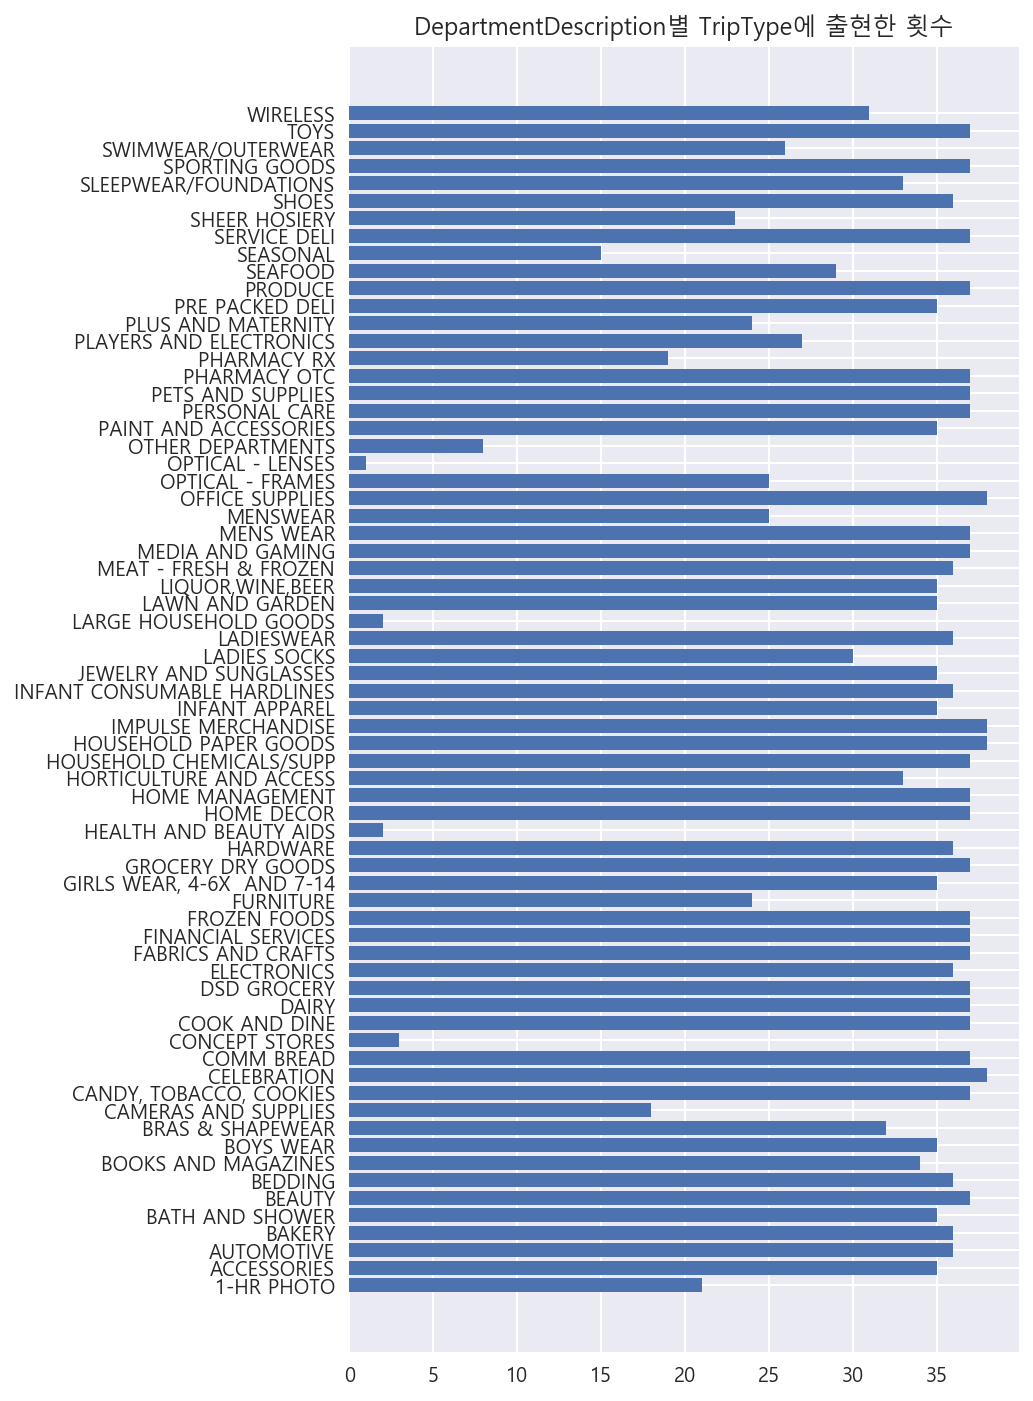

In [53]:
plt.figure(figsize=(6, 12))
plt.barh(dd_tt_total.index, dd_tt_total["total"])
plt.title("DepartmentDescription별 TripType에 출현한 횟수")
plt.show()

In [74]:
total_dds2 = []
for i in range(38):
    s = pv_dp_df4.iloc[i].sum()
    total_dds2.append(s)

In [78]:
tt_dd_total = pd.DataFrame(index=pv_dp_df4.index, data=total_dds2, columns=["total"])

In [79]:
tt_dd_total.tail()

,total
TripType,
41,64
42,63
43,61
44,63
999,67


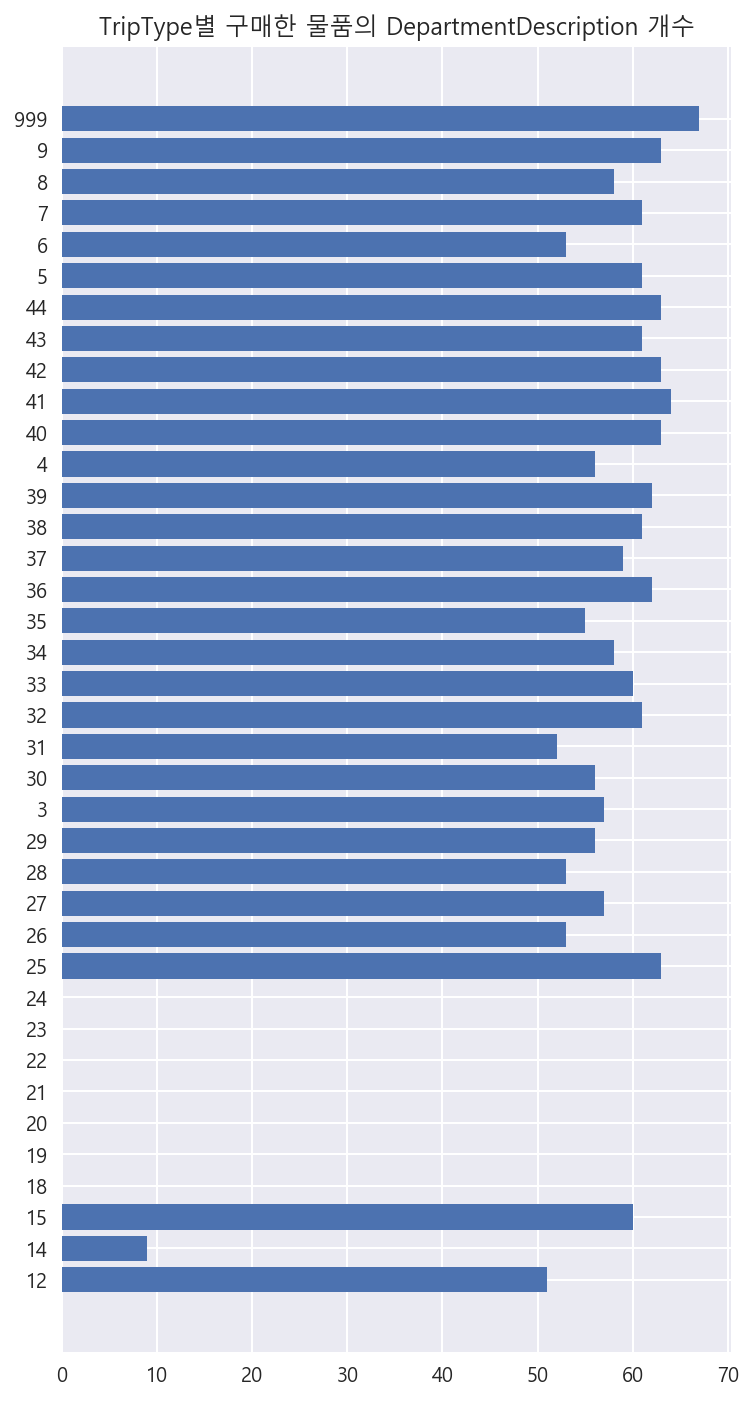

In [88]:
plt.figure(figsize=(6, 12))
plt.barh(tt_dd_total.index.astype("str"), tt_dd_total["total"])
plt.title("TripType별 구매한 물품의 DepartmentDescription 개수")
plt.show()

In [90]:
tt_dd_total.iloc[10:17]

,total
TripType,
18,54
19,56
20,55
21,52
22,57
23,32
24,61
